# 双光子驱动克尔非线性谐振腔
## 哈密顿量（Frame rotating at $\omega_r$）
$
H_0(\phi) = -K(a^{\dagger 2} - \alpha^2 e^{-2i\phi})(a^2 - \alpha^2 e^{2i\phi}) + \frac{P^2}{K}
$
这里 $P$ 为驱动强度，$\phi$ 为驱动相位，$K$ 为非线性强度，$\alpha = \sqrt{P/K}$

In [261]:
# 导入必要的包
from qutip import *
import numpy as np
from matplotlib import pyplot as plt

In [262]:
# 定义常数
P = 50
K = 0.5
phi = 0

alpha = np.sqrt(P/K)

In [263]:
# 构建升降算符
N = 200 # 计算空间维度
a = destroy(N)
a_dag = a.dag()

# 单位算符
I = qeye(N)

# 构建哈密顿量
H = -K * (a_dag * a_dag - (alpha ** 2 * np.exp(-2j * phi)) * I) * (a * a - (alpha ** 2 * np.exp(2j * phi)) * I) + (P ** 2 / K) * I

In [264]:
energy = H.eigenenergies()

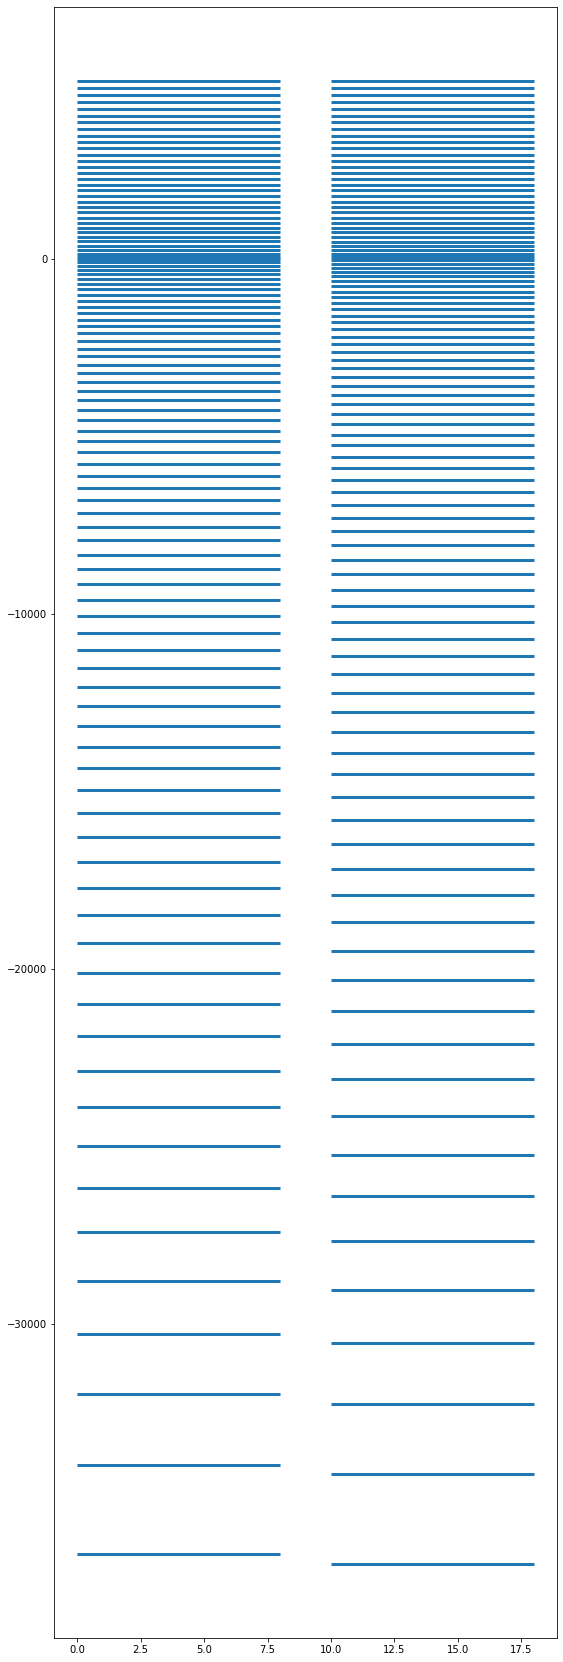

In [265]:
# 绘能级图
fig, axes = plt.subplots(1, 1, figsize = (9,30))

for i in range(len(energy)):
    if i % 2 != 0:
        axes.hlines(energy[i], 0, 8, linewidth=3)
    else:
        axes.hlines(energy[i], 10, 18, linewidth=3)

In [266]:
print(energy[N-1] - energy[N-3])
print(energy[N-1] - energy[N-2])

198.99492339696553
2.7284841053187847e-12


In [267]:
4 * K * alpha**2

200.0

In [268]:
# pair 能级差指数减少的范围
n = alpha ** 2 / 4
n

25.0

In [269]:
# 计算每一对的能级间距
pair_gap = list()
for i in range(N-1, N-2*(int(n)+1), -2):
    pair_gap.append(energy[i] - energy[i-1])

In [270]:
# 数据拟合
from scipy.optimize import curve_fit

# 定义拟合曲线的形式--指数函数
def func(x, a, b, c, d):
    y = a * b ** (c * x) + d
    return y
xdata = range(len(pair_gap))

# 曲线拟合
popt, pcov = curve_fit(func, xdata, pair_gap, maxfev=50000)


# 获取拟合曲线（popt中存储了拟合曲线的待定参数）
fit_x = np.linspace(xdata[0], xdata[-1], 100)
curve = [func(i, popt[0], popt[1], popt[2], popt[3]) for i in fit_x]

print(popt)

[ 2.82888665e-04  1.07179551e+00  4.95321663e+00 -1.72495363e-02]


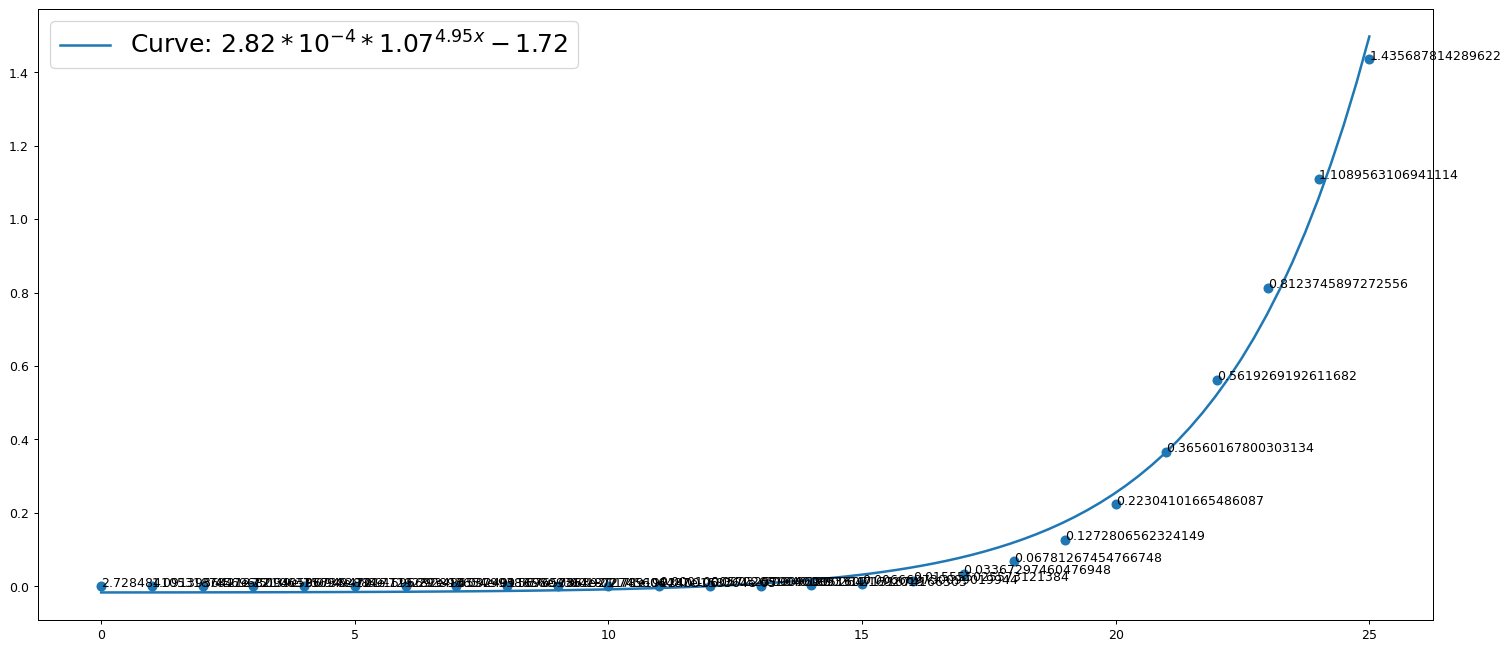

In [272]:
# 画数据点
plt.figure(figsize=(20,9), dpi=90)
plt.scatter(range(len(pair_gap)), pair_gap, linewidths=2)
# 标注数据
for i in range(len(pair_gap)):
    plt.annotate(pair_gap[i], (i, pair_gap[i]))

# 画拟合曲线
plt.plot(fit_x, curve, linewidth=2, label=r'Curve: $2.82*10^{-4} * 1.07^{4.95x} - 1.72$')

plt.legend(loc=2, fontsize=20)


plt.show()